In [ ]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print(X_train.shape)
(60000, 28, 28)

(60000, 28, 28)


(60000, 28, 28)

In [ ]:
X_train[0].min(), X_train[0].max()
(0, 255)

(0, 255)

In [ ]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)
X_train[0].min(), X_train[0].max()
(0.0, 1.0)

(0.0, 1.0)

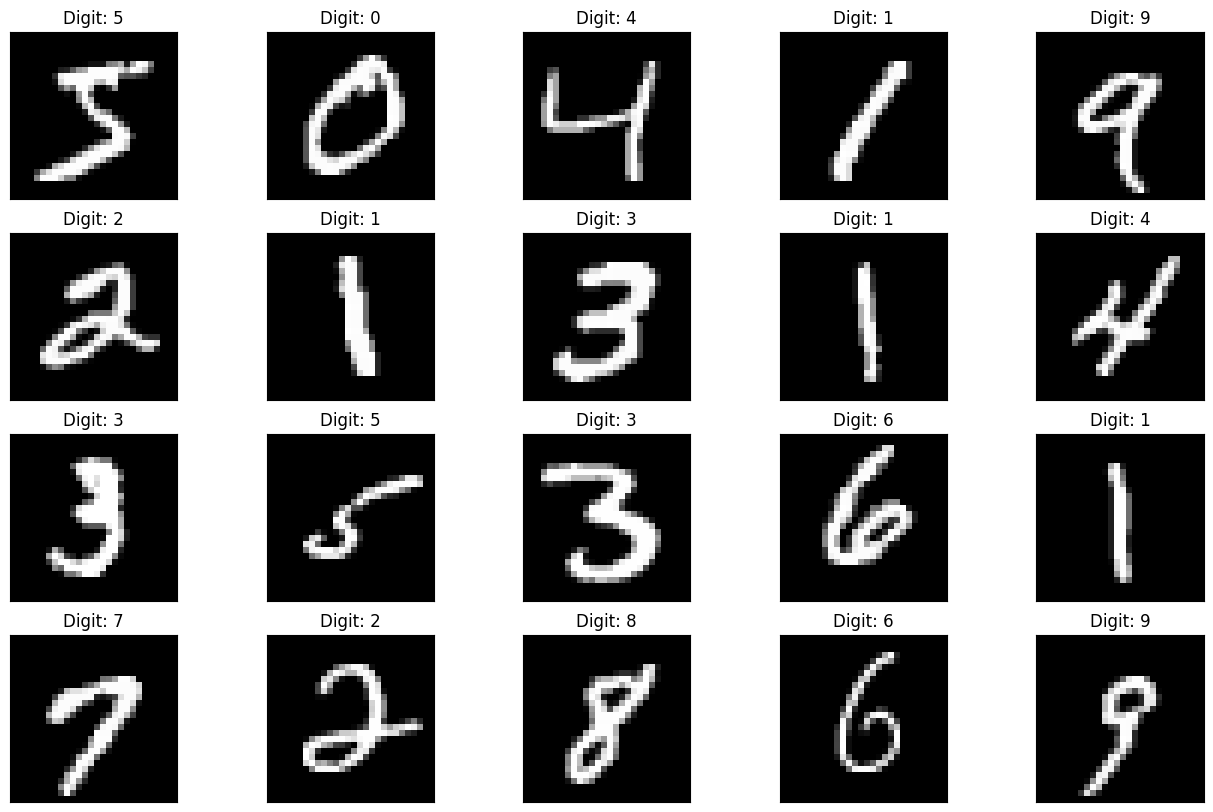

In [ ]:
def plot_digit(image, digit, plt, i):
  plt.subplot(4,5,i+1)
  plt.imshow(image, cmap=plt.get_cmap('gray'))
  plt.title(f"Digit: {digit}")
  plt.xticks([])
  plt.yticks([])
plt.figure(figsize=(16, 10))
for i in range(20):
  plot_digit(X_train[i], y_train[i], plt, i)
plt.show()

In [ ]:
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))

In [ ]:
y_train[0:20]



array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [ ]:
model = Sequential([
Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
MaxPooling2D((2, 2)),
Flatten(),
Dense(100, activation="relu"),
Dense(10, activation="softmax")
])


In [ ]:
optimizer = SGD(lr=0.01, momentum=0.9)
model.compile(
optimizer=optimizer,
loss="sparse_categorical_crossentropy",
metrics=["accuracy"]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2394 - accuracy: 0.9295
Epoch 2/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0794 - accuracy: 0.9761
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0503 - accuracy: 0.9847
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0364 - accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0268 - accuracy: 0.9916
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0201 - accuracy: 0.9936
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0150 - accuracy: 0.9957
Epoch 8/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0107 - accuracy: 0.9972
Epoch 9/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0077 - accuracy: 0.9980
Epoch 10/10
1875/1875 [==============================] - 39s 21m

1/1 [==============================] - 0s 46ms/step


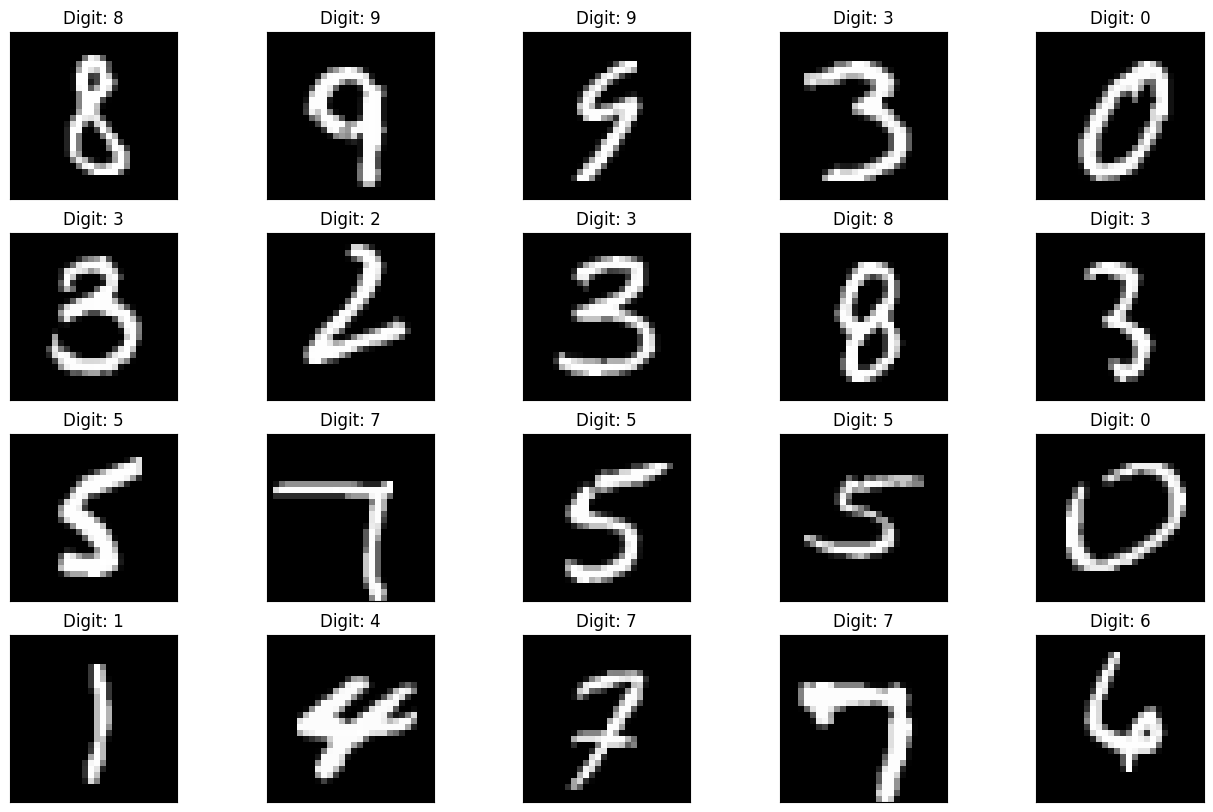

In [ ]:
plt.figure(figsize=(16, 10))
for i in range(20):
  image = random.choice(X_test).squeeze()
  digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0],
                  axis=-1)
  plot_digit(image, digit, plt, i)
plt.show()

In [ ]:
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, predictions)



313/313 [==============================] - 4s 14ms/step


0.9862

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) #Test loss: 0.0296396646054
print('Test accuracy:', score[1]) #Test accuracy: 0.9904

Test loss: 0.045736633241176605
Test accuracy: 0.9861999750137329


NameError: ignored

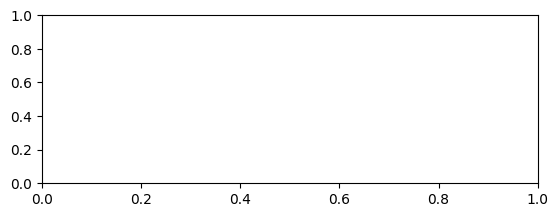

In [ ]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])


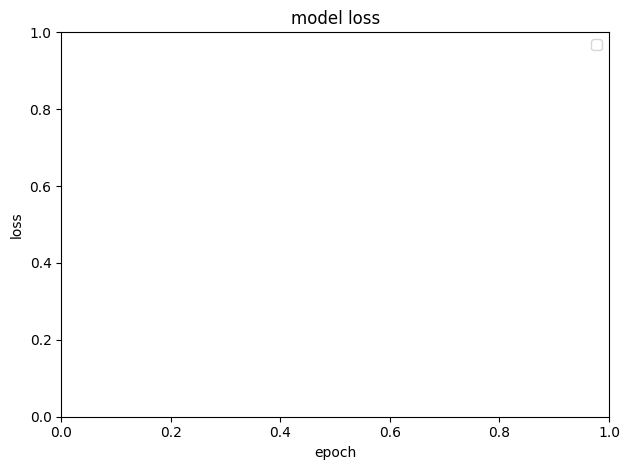

In [ ]:
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [ ]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
  json_file.write(model_digit_json)
# serialize weights to HDF5
  model.save_weights("model_digit.h5")
  print("Saved model to disk")

Saved model to disk
